**Task**

For this assignment, you will continue revisiting your first project to predict supermarket sales. You will be applying everything you've learned thus far this week to explain how your models made their predictions.

**Project 1 Revisited - Part 2: Global Explanations**

**Load Your Saved Joblib File**

Create a new notebook for this assignment in your project 1 repository. Name the notebook "Explaining Models with Shap.ipynb"

In your notebook, load the contents of your "best-models.joblib" file into a variable called "loaded_joblib."

Save each object from the loaded_joblib dictionary as a separate variable in your notebook. (e.g. "X_train = loaded_joblib['X_train'])

**Explain your tree-based model with shap:**

Create an X_shap and y_shap variable from your training data (use shap.sample as needed).

Create a model explainer,
Calculate the shap values for your model.

Create a summary plot - with plot_type='bar':
In a Markdown cell below, display your saved feature importance image (that you used in your README) and compare the most important features according to SHAP vs. your original feature importances.

Are they the same features in both? If not, what's different?

Save your bar summary plot figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

Create a second summary plot - with plot_type='dot'
In a markdown cell, interpret the top 3 most important features and how they influence your model's predictions.
Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

**Update your README.**

Insert your exported figures and corresponding interpretations from above into your README file. You should have:

a summary plot - bar version

Your comparison of most important features found by shap vs feature importance.

a summary plot - dot version

Your interpretation of the top 3 most important features and how they influence your model's predictions.

Submit the link to your project repository as your final submission for this assignment.





In [3]:
##Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as miss

##Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

##Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

##Setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
##Matplotlib style
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

**Load Your Saved Joblib File**

In [4]:
import joblib, os

In [5]:
#Load data from part 1 of 'Project 1 Revisited'
loaded_joblib = joblib.load('best-models.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForestRegressor'])

In [6]:
X_train = loaded_joblib['X_train']
X_test = loaded_joblib['X_test']
y_train = loaded_joblib['y_train']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
lin_reg = loaded_joblib['LinearRegression']
rand_for = loaded_joblib['RandomForestRegressor']

In [7]:
#Fit column transformer and get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

In [8]:
#Remake X_train dataframes with feature names
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                         columns = feature_names, index = X_train.index)
X_train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,,,,,,,,
FDI60,7.220,1.0,0.064142,61.2510,1998.0,0.760582,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
DRD25,6.135,0.0,0.079294,111.2860,2009.0,1.000000,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
NCP18,12.150,0.0,0.028593,151.0708,2004.0,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
NCS30,5.945,0.0,0.093009,127.8652,2004.0,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
FDI08,18.200,1.0,0.066285,247.2092,2004.0,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
#Remake X_test dataframes with feature names
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                         columns = feature_names, index = X_test.index)
X_test_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,,,,,,,,
NCY06,15.250000,0.0,0.061531,132.2968,2007.0,0.760582,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
FDZ10,17.850000,0.0,0.044463,127.1020,1997.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
DRF49,7.270000,0.0,0.071078,114.2518,1997.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
FDN23,12.822634,1.0,0.075142,145.8444,1985.0,1.000000,2.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
NCH54,13.500000,0.0,0.121633,161.6920,1998.0,0.760582,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**SHAP**

In [10]:
#Import shap and initialize javascript:
import shap
shap.initjs()

In [11]:
#Check length of traning df
len(X_train_df)

6392

**Create SHAP variables**

In [12]:
#Create X_shap using 500 samples and check
X_shap = shap.sample(X_train_df, nsamples=500, random_state=SEED)
X_shap.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,,,,,,,,
FDT23,7.72,1.0,0.074669,76.3986,1987.0,2.000000,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
NCU30,5.11,0.0,0.034868,163.8210,2004.0,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
FDD44,8.05,1.0,0.078386,256.4646,2004.0,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
NCB54,8.76,0.0,0.050131,128.3336,1999.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
FDQ56,6.59,0.0,0.176748,82.7908,1998.0,0.760582,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [13]:
#Create y_shap using corresponding values
y_shap = y_train.loc[X_shap.index]
y_shap

Item_Identifier
FDT23    1090.5804
FDT23    1947.4650
FDT23    1402.1748
NCU30    2773.0570
NCU30    2446.8150
           ...    
FDT32     188.4214
FDT32    1695.7926
FDT32    5087.3778
FDT32    2261.0568
FDT32    2826.3210
Name: Item_Outlet_Sales, Length: 2370, dtype: float64

**Create Model Explainer**

In [14]:
#Create model explainer for random forest model
explainer = shap.TreeExplainer(rand_for)
explainer

In [15]:
#Get SHAP values
shap_values = explainer(X_shap, y_shap)
type(shap_values)

shap._explanation.Explanation

In [16]:
#Display shape of shap_values
shap_values.shape

(500, 37)

**Displayed SHAP Values**

In [17]:
pd.DataFrame(shap_values.values, columns=X_shap.columns)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,64.224889,19.070337,30.481797,-976.097292,-65.059005,-10.344684,-32.074128,-4.421323,20.654717,0.279092,...,-0.052328,-42.159625,-4.664162,0.924253,0.382145,-2.705304,206.265465,3.556028,3.488626,-39.599635
1,-189.530591,-7.708093,53.515392,275.951131,-35.498713,-3.402851,6.179138,-13.676098,-0.748194,-0.699290,...,-0.144375,-67.023234,49.244876,3.065863,1.566151,-17.060191,272.894701,3.258692,-2.286533,-61.465521
2,275.356394,-20.400398,141.279074,2209.985544,17.783558,-5.643352,8.549386,-3.419093,1.819708,2.283391,...,0.094702,-79.759557,-3.001133,16.029021,3.244458,-8.710283,417.851363,27.834301,7.144179,-88.095934
3,-19.375768,0.741248,12.900569,-202.753434,-18.328321,7.257190,39.175474,-0.561717,0.415207,0.135833,...,0.011194,-63.824533,-9.177209,14.563521,-5.299274,75.675039,249.033026,5.819635,1.192786,-50.557980
4,6.612456,0.573188,-2.043314,-484.411870,-15.239561,-3.636898,-5.731198,-2.779297,-1.207246,-0.218650,...,-0.311710,-27.445604,-3.004407,0.702458,0.731230,-2.246970,-1449.014087,-13.225598,1.588985,-25.006458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,186.130799,87.223148,219.655984,632.842254,50.411427,58.541893,21.180814,-2.523297,-0.487425,-0.670428,...,0.179407,-53.067509,-7.478761,6.848859,25.941011,-1.172007,327.824557,17.194858,15.311452,-55.857302
496,35.462456,0.279975,25.906750,-535.484264,-79.131559,-9.466447,-5.822765,-3.631029,-1.756713,-0.889927,...,-0.101051,-56.995348,-7.664127,9.749068,0.492703,-2.503881,220.914505,-25.705078,-12.032138,-49.507430
497,174.556421,23.250979,359.047930,1347.841305,-39.980561,40.411608,20.183521,-1.031576,-2.378097,-2.572768,...,0.256432,-70.257201,0.182328,19.150889,9.571733,3.192630,345.721422,3.533582,-6.821721,-79.991901
498,-53.313206,-4.268531,-62.625179,-1414.860602,-66.629579,-43.821710,-1.124801,-9.031039,-0.887911,-0.222233,...,0.017622,-40.631594,-9.793810,-3.138241,-3.424645,-11.455065,174.072016,2.022253,0.275930,-36.862540


**SHAP Summary Plot - Type Bar**

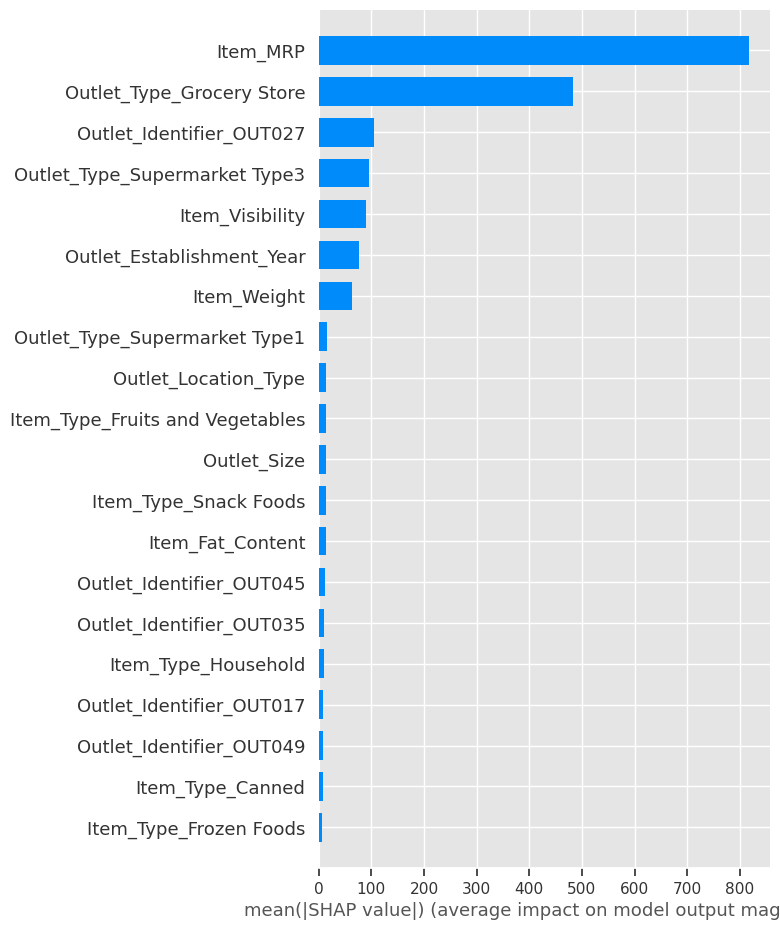

In [18]:
shap.summary_plot(shap_values, features=X_shap, plot_type='bar')

**HAP summary plot vs top 5 most important features**

<img src="top5mostimport.png" width=500 height=500 />

**Are they the same features in both? If not, what's different?**

Top two values are the same in each plot. The remaining top 5 are in the top 7 of the SHAP plot. Just a slightly different order.

**SHAP summary plot - Type dot**

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


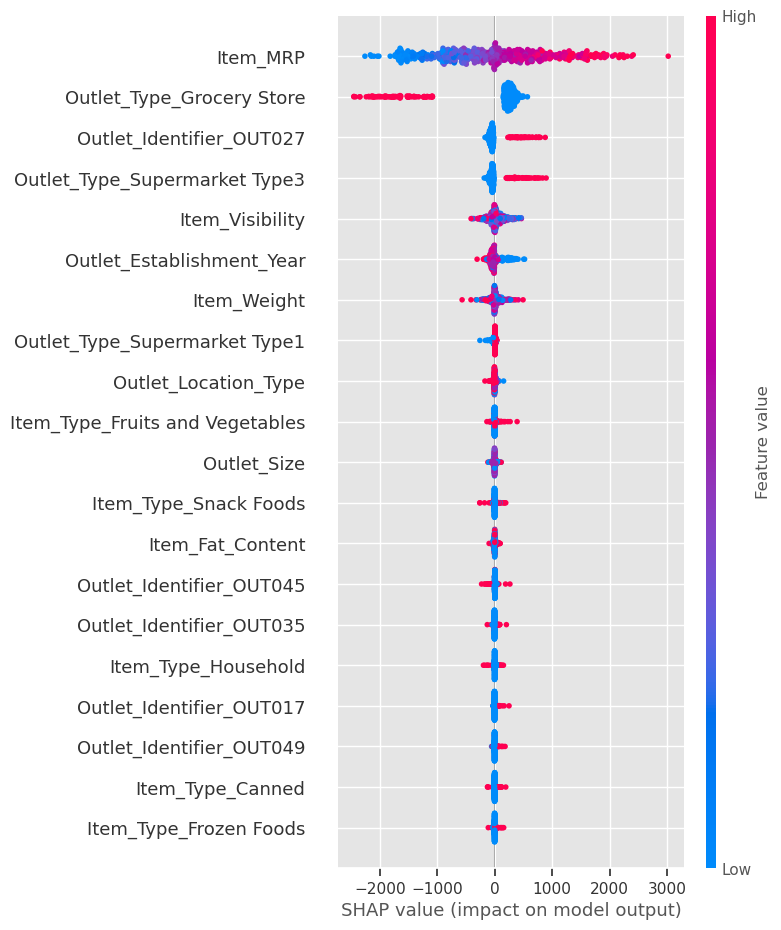

In [19]:
shap.summary_plot(shap_values, features=X_shap, plot_type='dot')

Top 3: Item_MRP, Outlet_type_Grocery Store and Outlet_Identifier_OUT027.

Item_MRP influences the model mostly positively. The red is on the right (positive), higher values of this feature increase the chance the prediction will be fail.

Outlet_type_Grocery Store influences the model mostly negatively. If the red is on the left (negative), higher values of this feature decrease the chances the prediction will be fail.

Outlet_Identifier_OUT027 influences the modle mostly positively. The red is on the right (positive), higher values of this feature increase the chance the prediction will be fail.

**Part 3: Local Explanations**

**Task**

For this assignment, you will be revisiting your first project to predict supermarket sales. You will be applying everything you've learned this week to explain how your models made their predictions.

**Part 3 - Local Explanations**

Continue working in your model explanation notebook from the previous core assignment. Add a new "Local Explanations" header at the bottom and continue your work:

Select at least 2 example rows/outlets based on the insights gained from your previous core assignments this week.

Explain why you selected the examples that you did.
If you're having trouble thinking of which type of examples to select, try selecting a store that had low sales ( one of the lowest values for your target) and one with high sales (the highest values for your target).

**For each example, produce:**

a Lime tabular explanation

Interpret what features most heavily influenced the predictions, according to LIME.

Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README). Note: you will need to take a screenshot to save the lime explanation.

an Individual Force Plot

Interpret what features most heavily influenced the predictions, according to SHAP.

Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README). Note: you will need to take a screenshot to save the individual force plot.


Update your README.

Add your explanation for why you selected the individual examples that you visualized.
For each example (need at least 2 examples)

A Lime tabular explanation
Your corresponding interpretation

A sharp force plot
Your corresponding interpretation.

Submit the link to your project repository as your final submission for this assignment.

Submit

**Get the Store ID with the highest and lowest MRP sales**

In [20]:
#Reset indexes of X_shap and y_shap as local variables
X_shap_local = X_shap.reset_index(drop=True)
y_shap_local = y_shap.reset_index(drop=True)

In [21]:
y_shap_local.head()

0    1090.5804
1    1947.4650
2    1402.1748
3    2773.0570
4    2446.8150
Name: Item_Outlet_Sales, dtype: float64

In [22]:
#Sort y_test by descending to get the store with the largest MRP sales 
y_shap_desc = y_shap_local.sort_values(ascending=False)
y_shap_desc.head()

439     13086.9648
171     13086.9648
862     11445.1020
1411    11445.1020
2288     9371.8008
Name: Item_Outlet_Sales, dtype: float64

In [23]:
#Sort y_test by escending to get the store with the lowest MRP sales among the 1st 499 rows
y_shap_asc = y_shap_local.loc[1:499].idxmin()
y_shap_asc

50

In [24]:
#Assign variable of store with highest sales to corresponding X data
X_shap_high = X_shap_local.loc[439]
#Assign variable of store with lowest sales to corresponding X data
X_shap_low = X_shap_local.loc[y_shap_asc]

The store with the highest MRP sales is has its value at 13086 and the store with the lowest MRP sales is has a value of 50. 

We chose these two stores to compare the top features that most influence the respective MRP sales at a local level.

**Lime**

In [25]:
#Import Lime and create lime explainer
from lime.lime_tabular import LimeTabularExplainer
lime_explainer = LimeTabularExplainer(training_data=X_shap_local.values,
                                     feature_names=X_shap_local.columns,
                                     mode='regression')
lime_explainer

In [26]:
#Use lime explainer to explain selected high sales example
exp_high = lime_explainer.explain_instance(X_shap_high, rand_for.predict)
exp_high.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [27]:
#Use lime explainer to explain selected low sales example
exp_low = lime_explainer.explain_instance(X_shap_low, rand_for.predict)
exp_low.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


The two lime results above show the importance of each feature in predicting the sales for the store netting a high sales value of 13086 and the store netting a low sales value of 50 as selected previously. For both stores, the features that are influencing their respective sales the most are the 'Outlet_Type_Grocery_Store' and 'Item_MRP'. Between the two stores, the store with the higher sales has a higher 'Item_MRP' than the store with lower sales. This may suggest that the store with higher sales may mark up their product more or may have more of a product offering/variation that the other store. The 'Outlet_Type_Grocery_Store' may describe a different type of store that may be more or less be convenient to customers that may further describe the variation in sales between the two stores.

**Force Plot**

In [28]:
#Force plot for high sales store
shap.force_plot(explainer.expected_value, shap_values=X_shap_high.values,
               features=X_shap_high)

In [29]:
#Force plot for low sales store
shap.force_plot(explainer.expected_value, shap_values=X_shap_low.values,
               features=X_shap_low)

According to both force plots above, the feature that most influenced the predictions for the stores with high and low sales was the Outlet_Establishment_Year. The higher producing store was from 1999 and the lower producing  store was from 1998.